In [80]:
import pandas as pd
#if you get an error after executing the code, try adding below. pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2021, 11, 1)
sp500 = web.DataReader(['sp500'], 'fred', start, end).squeeze() #convert dataframe to series

In [81]:
#print(type(SP500))
#panel_data.to_frame().head(9)

In [82]:
sp500.to_frame().head(9)
#sp500.describe()

,sp500
DATE,
2011-12-02,1244.28
2011-12-05,1257.08
2011-12-06,1258.47
2011-12-07,1261.01
2011-12-08,1234.35
2011-12-09,1255.19
2011-12-12,1236.47
2011-12-13,1225.73
2011-12-14,1211.82


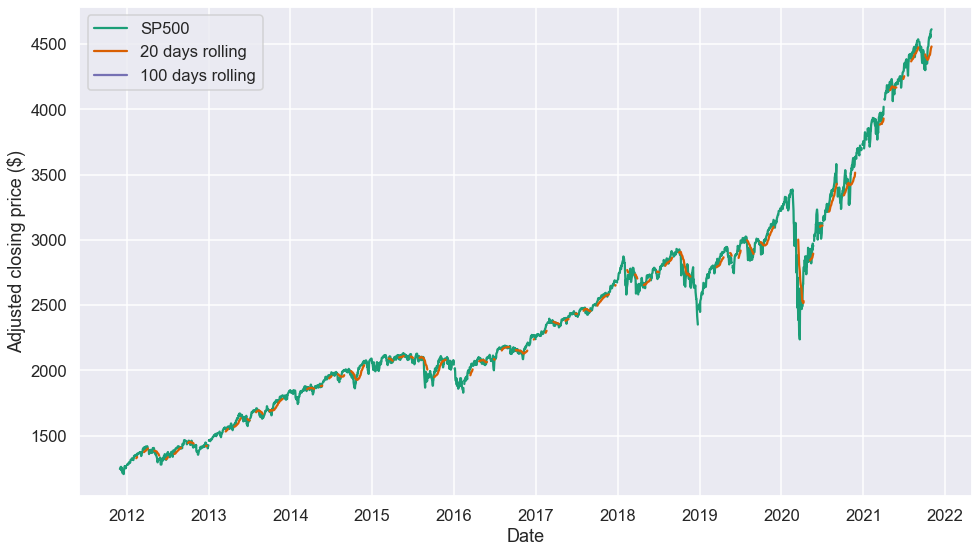

In [83]:
# plot 20 and 100 days moving average of closing price
# the first n-1 days are not valid
short_rolling_sp500 = sp500.rolling(window=20).mean()
long_rolling_sp500 = sp500.rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(sp500.index, sp500, label='SP500')
ax.plot(short_rolling_sp500.index, short_rolling_sp500, label='20 days rolling')
ax.plot(long_rolling_sp500.index, long_rolling_sp500, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [84]:
short_rolling_sp500.tail()

DATE
2021-10-26    4429.4185
2021-10-27    4439.0295
2021-10-28    4453.4735
2021-10-29    4465.8905
2021-11-01    4481.5510
Name: sp500, dtype: float64

In [90]:
# Calculate relative returns
returns = sp500.pct_change(1)
#returns.head()
# Log returns 
log_returns = np.log(sp500).diff()
#log_returns.head()

In [91]:
#convert last day of returns and make it as column vector 
r_t = log_returns.tail(1).transpose()
r_t

DATE
2021-11-01    0.001798
Name: sp500, dtype: float64